In [1]:
import sympy as sm

In [26]:
a,b,c,d,x,y=sm.symbols('a b c d x y')
expr=(-1+x*a-y* a**2)*(-1+x*b-y* b**2)*(1+x*c+y* c**2)*(-1+x*d-y* d**2)
expr

(-a**2*y + a*x - 1)*(-b**2*y + b*x - 1)*(c**2*y + c*x + 1)*(-d**2*y + d*x - 1)

In [1]:
#sm.expand(expr)

In [2]:
#sm.collect(sm.expand(expr),x)

In [5]:
pip install numba


     ---------------------------------------- 2.6/2.6 MB 12.7 MB/s eta 0:00:00
     --------------------------------------- 28.1/28.1 MB 34.4 MB/s eta 0:00:00


In [2]:
from numba import cuda, void, float32#,autojit
import numpy as np
import scipy.stats as stats
import time
import matplotlib.pyplot as plt


In [3]:
cuda.is_available()

True

In [116]:
@cuda.jit
def aux(a,b):
    #print(a)
    return a+b

@cuda.jit
def increment_by_one(a,b):
    # Thread id in a 1D block
    ttx = cuda.threadIdx.x
    # Block id in a 1D grid
    tty = cuda.blockIdx.x
    # Block width, i.e. number of threads per block
    bw = cuda.blockDim.x
    # Compute flattened index inside the array
    pos = ttx + tty * bw
    if pos < a.size:  # Check array boundaries
        b[pos] = aux(a[pos],a[pos])

@cuda.jit
def multiple(A,B):
    tx = cuda.threadIdx.x
    # Block id in a 1D grid
    ty = cuda.blockIdx.x
    # Block width, i.e. number of threads per block
    bw = cuda.blockDim.x
    # Compute flattened index inside the array
    pos = tx + ty * bw
    if pos < A.size:  # Check array boundaries
        "LOL"
        aux(A[pos],B[pos])
        #B[pos]=A[pos]+[3.0][0]


a=np.random.rand(10)
a=np.ones(11)
b=0*a
print(a)
d_a = cuda.to_device(a)
d_b=cuda.to_device(b)
increment_by_one[3,4](d_a,d_b)
d_b.copy_to_host(b)
print(b)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


C:\Users\sud4d\anaconda3\lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 3 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


In [117]:
np.random.rand(10).astype('float32')

array([0.64487046, 0.6529559 , 0.5034939 , 0.98147964, 0.8237834 ,
       0.580264  , 0.00486235, 0.01441717, 0.8899229 , 0.03758467],
      dtype=float32)

In [118]:
A=[np.random.rand(10).astype('float32') for i in range(1,10)]
B=np.array([np.zeros(10).astype('float32') for i in range(1,10)])

threadsperblock = 32
blockspergrid = (len(A) + (threadsperblock - 1)) // threadsperblock
d_a = cuda.to_device(A)
d_b=cuda.to_device(B)
A,B

([array([0.89207953, 0.30858433, 0.8519499 , 0.34406886, 0.5895622 ,
         0.13422015, 0.88394624, 0.59620583, 0.05818148, 0.08060555],
        dtype=float32),
  array([0.64192736, 0.2629591 , 0.48398015, 0.5240583 , 0.52784765,
         0.7730952 , 0.17066985, 0.83990556, 0.18385789, 0.05823001],
        dtype=float32),
  array([0.7081982 , 0.07377198, 0.5102979 , 0.25122693, 0.8306524 ,
         0.3258831 , 0.16127439, 0.29455823, 0.41694078, 0.40792063],
        dtype=float32),
  array([0.90276694, 0.15010563, 0.20865083, 0.1156913 , 0.65385336,
         0.7912528 , 0.2697249 , 0.9381705 , 0.7849609 , 0.3149366 ],
        dtype=float32),
  array([0.01508705, 0.51396585, 0.8775108 , 0.27913237, 0.05165802,
         0.4718872 , 0.42484266, 0.57854205, 0.0260251 , 0.6533094 ],
        dtype=float32),
  array([0.5733383 , 0.43074507, 0.145108  , 0.59658843, 0.86468655,
         0.8799917 , 0.812198  , 0.5675382 , 0.8157629 , 0.59092206],
        dtype=float32),
  array([0.46509504, 0

In [119]:
multiple[blockspergrid,threadsperblock](d_a,d_b)
d_b.copy_to_host(B)
A,B

C:\Users\sud4d\anaconda3\lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


TypingError: Failed in cuda mode pipeline (step: nopython frontend)
[1m[1mFailed in cuda mode pipeline (step: nopython frontend)
[1m[1mNo implementation of function Function(<built-in function add>) found for signature:
 
 >>> add(array(float32, 1d, C), array(float32, 1d, C))
 
There are 16 candidate implementations:
[1m      - Of which 14 did not match due to:
      Overload of function 'add': File: <numerous>: Line N/A.
        With argument(s): '(array(float32, 1d, C), array(float32, 1d, C))':[0m
[1m       No match.[0m
[1m      - Of which 2 did not match due to:
      Operator Overload in function 'add': File: unknown: Line unknown.
        With argument(s): '(array(float32, 1d, C), array(float32, 1d, C))':[0m
[1m       No match for registered cases:
        * (int64, int64) -> int64
        * (int64, uint64) -> int64
        * (uint64, int64) -> int64
        * (uint64, uint64) -> uint64
        * (float32, float32) -> float32
        * (float64, float64) -> float64
        * (complex64, complex64) -> complex64
        * (complex128, complex128) -> complex128[0m
[0m
[0m[1mDuring: typing of intrinsic-call at C:\Users\sud4d\AppData\Local\Temp\ipykernel_41780\576028934.py (4)[0m
[1m
File "AppData\Local\Temp\ipykernel_41780\576028934.py", line 4:[0m
[1m<source missing, REPL/exec in use?>[0m

[0m[1mDuring: resolving callee type: type(CUDADispatcher(<function aux at 0x00000238A7514700>))[0m
[0m[1mDuring: typing of call at C:\Users\sud4d\AppData\Local\Temp\ipykernel_41780\576028934.py (30)
[0m
[1m
File "AppData\Local\Temp\ipykernel_41780\576028934.py", line 30:[0m
[1m<source missing, REPL/exec in use?>[0m


C:\Users\sud4d\anaconda3\lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 19 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


0.8284000999992713


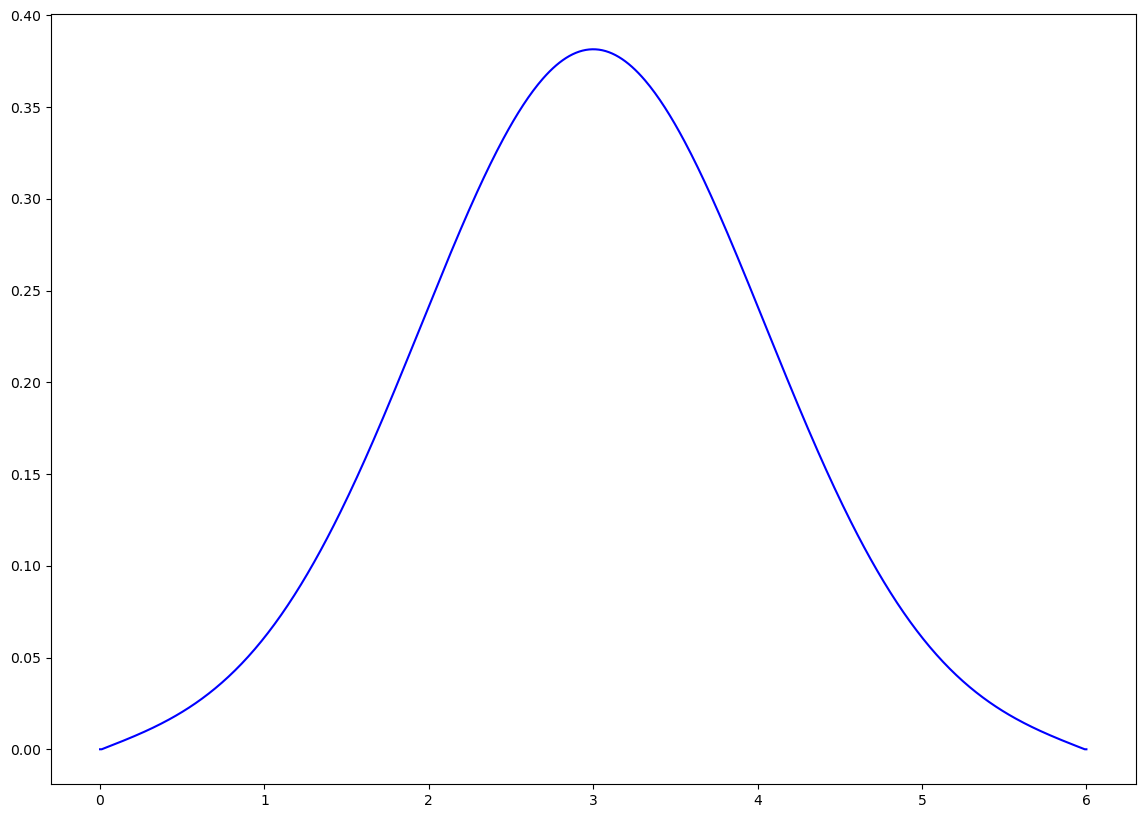

In [120]:

    
##################### Numba GPU Version


@cuda.jit(void(float32[::1], float32[::1], float32[::1]))
def solve_pde(u, v, parameters):

    # Equation parameters
    dx = parameters[0]
    dt = parameters[1]
    D =  parameters[2]
    u_size = u.size

    # Index of thread on GPU
    i = cuda.grid(1)

    # Condition to avoid threads accessing indices out of array
    if i < u_size:
            
        if(i in [0, 1, u_size-2, u_size-1]):  # Natural boundary conditions
                
            v[i] = np.float32(0.)
            
        else:
                
            # Compute second order derivatives
            RHS = D*(u[i + 1] - 2*u[i] + u[i - 1])/(dx*dx)

            # Update state vector
            v[i] = u[i] + RHS*dt


# Equation parameters
dx = 0.01
dt = 0.01
t0 = 0
t_end = 100
D = 0.005  # Diffusion coefficient
parameters = np.array([dx, dt, D], dtype="float32")

# Initial state vector
mu = 3
std = 0.3
x = np.linspace(0, 6, int(6/dx), dtype="float32")
u = np.array(stats.norm.pdf(x, mu, std), dtype="float32")

# Manage the number of threads
threads_per_block = 32
blocks_per_grid = (u.size + (threads_per_block - 1)) \
        // threads_per_block

# Start timer
start = time.perf_counter()

# Initialize the state vector u and the buffer v on the GPU
d_u = cuda.to_device(u)
d_v = cuda.device_array(u.shape, dtype="float32")
d_parameters = cuda.to_device(parameters)

# Loop across time
for i in range(int((t_end-t0)/dt)):
    
    if (i % 2) == 0:
        
        solve_pde[blocks_per_grid, threads_per_block](d_u, d_v, d_parameters)
    
    else:
        
        solve_pde[blocks_per_grid, threads_per_block](d_v, d_u, d_parameters)
    
    
u = d_u.copy_to_host()

# Measure the time elapsed and print the result
end = time.perf_counter()
print(end - start)

# Plot the final state vector
plt.figure(figsize=(14, 10))
plt.plot(x, u, 'b-')



27.02291040000273


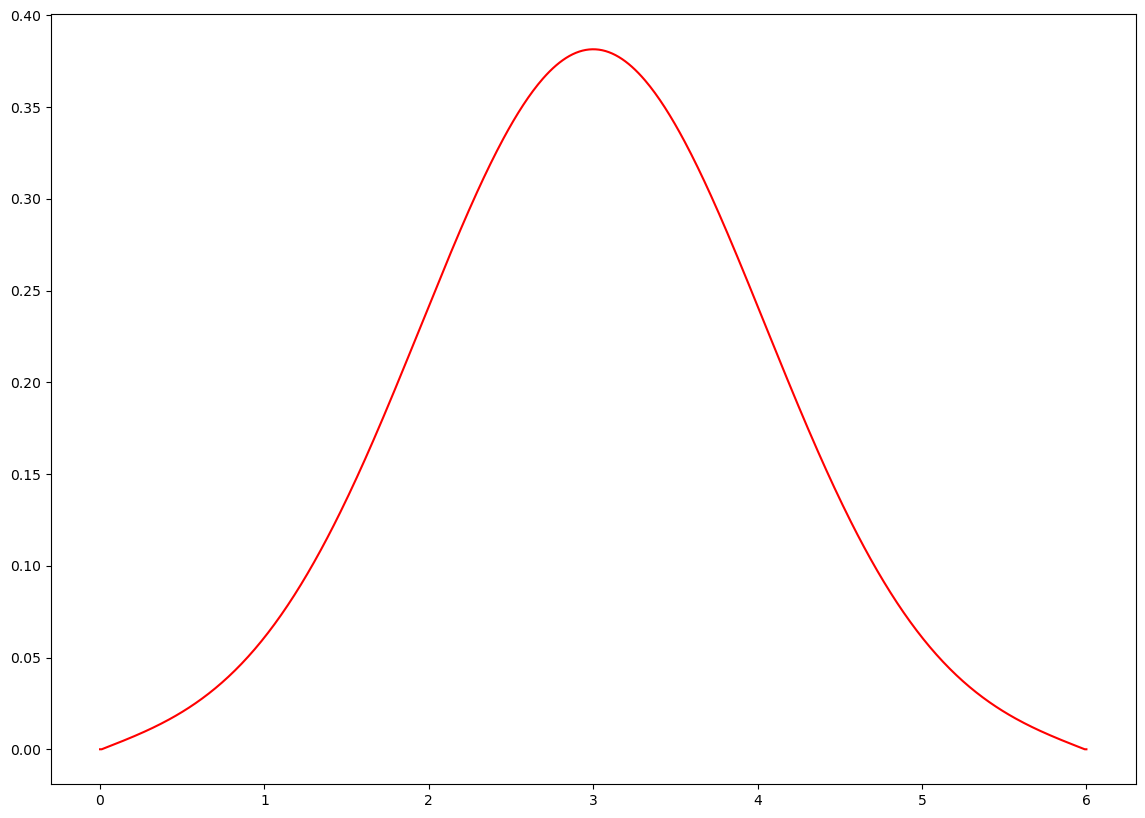

In [13]:


u = np.array(stats.norm.pdf(x, mu, std), dtype="float32")
v = np.empty_like(u)
u_size = u.size

start = time.perf_counter()


t = t0


while t < t_end:
    
    for i in range(u_size):
                
        if(i in [0, 1, u_size-2, u_size-1]):
            
            v[i] = 0
        
        else:
            
            RHS = D*(u[i + 1] - 2*u[i] + u[i - 1])/(dx*dx)
            v[i] = RHS*dt
        
    u += v
    t += dt


end = time.perf_counter()
print(end-start)
plt.figure(figsize=(14, 10))
plt.plot(x, u, 'r-')



In [14]:
print(cuda.gpus)

<Managed Device 0>


In [15]:
cuda.detect()

Found 1 CUDA devices
id 0    b'NVIDIA GeForce GTX 1650 with Max-Q Design'                              [SUPPORTED]
                      Compute Capability: 7.5
                           PCI Device ID: 0
                              PCI Bus ID: 1
                                    UUID: GPU-a545e5b7-49af-931a-9733-e75fe6f8194d
                                Watchdog: Enabled
                            Compute Mode: WDDM
             FP32/FP64 Performance Ratio: 32
Summary:
	1/1 devices are supported


True

In [16]:
@cuda.jit
def add_scalars(a, b, c):
    c[0] = a + b

dev_c = cuda.device_array((1,), np.float32)

add_scalars[1, 1](2.0, 7.0, dev_c)

c = dev_c.copy_to_host()
print(f"2.0 + 7.0 = {c[0]}")

2.0 + 7.0 = 9.0


C:\Users\sud4d\anaconda3\lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


In [17]:
@cuda.jit
def add_array(a, b, c):
    i = cuda.threadIdx.x + cuda.blockDim.x * cuda.blockIdx.x
    if i < a.size:
        c[i] = a[i] + b[i]

N = 20
a = np.arange(N, dtype=np.float32)
b = np.arange(N, dtype=np.float32)
dev_c = cuda.device_array_like(a)

add_array[4, 8](a, b, dev_c)

c = dev_c.copy_to_host()
print(c)


[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38.]


C:\Users\sud4d\anaconda3\lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 4 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\sud4d\anaconda3\lib\site-packages\numba\cuda\cudadrv\devicearray.py:886: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


In [20]:
3**(-1/3) /1


0.6933612743506348

In [126]:
################################################################

In [136]:
import asyncio
import time

import nest_asyncio
nest_asyncio.apply()

def background(f):
    def wrapped(*args, **kwargs):
        return asyncio.get_event_loop().run_in_executor(None, f, *args, **kwargs)

    return wrapped


inp=[np.random.rand(2,2) for i in range(10)]

@background
def your_function(argument, other_argument): # Added another argument
    time.sleep(5)
    
    print(f"function finished for {argument=} and {other_argument=}")
    return argument**2 + other_argument

def code_to_run_before():
    print('This runs Before Loop!')

def code_to_run_after():
    print(">>>>>>{}".format(results))
    print('This runs After Loop!')

In [138]:
code_to_run_before()                                                         # Anything you want to run before, run here!   

loop = asyncio.get_event_loop()                                              # Have a new event loop
t1=time.time()
group1 = asyncio.gather(*[your_function(inp[i], 1) for i in range(1, 2)])         # Run all the loops you want
group2 = asyncio.gather(*[your_function(inp[i], 2) for i in range(3, 5)])         # Run all the loops you want
group3 = asyncio.gather(*[your_function(inp[i], 3) for i in range(6, 9)])         # Run all the loops you want

all_groups = asyncio.gather(group1, group2, group3)                          # Gather them all                                    
results = loop.run_until_complete(all_groups)                                # Wait until finish

code_to_run_after()    
print(time.time()-t1)

This runs Before Loop!
function finished for argument=array([[0.51442788, 0.5469103 ],
       [0.93387356, 0.11614808]]) and other_argument=3function finished for argument=array([[0.4150653 , 0.69605938],
       [0.5609668 , 0.24731678]]) and other_argument=3
function finished for argument=array([[0.83763193, 0.47115199],
       [0.19144137, 0.46516069]]) and other_argument=2
function finished for argument=array([[0.88095839, 0.79734346],
       [0.68970087, 0.09940306]]) and other_argument=3
function finished for argument=array([[0.22759051, 0.71154737],
       [0.68940318, 0.49343855]]) and other_argument=2
function finished for argument=array([[0.37004766, 0.34445524],
       [0.74165517, 0.76424848]]) and other_argument=1

>>>>>>[[array([[1.13693527, 1.11864941],
       [1.55005239, 1.58407574]])], [array([[2.70162724, 2.2219842 ],
       [2.0366498 , 2.21637447]]), array([[2.05179744, 2.50629966],
       [2.47527675, 2.2434816 ]])], [array([[3.17227921, 3.48449866],
       [3.3146

In [1]:
#########################################

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [62]:
(-1+0*1j)**2.1

(0.9510565162951536+0.3090169943749472j)

In [92]:
def F(a):
    def f(x):
        return (x+0*1j)**a
    def f2(x):
        if x>=0:
            # x>0 ==> f(x) is real
            return x**(a)
        else:
            #x < 0 ==> f(x) is complex such that f(x)*conjugate(f(x))  = |f(x)|**2
            
            return (x+0*1j)**a
    N=1000
    x=np.linspace(-3,3,N)
    X=[]
    Y=[]
    #Z= X + 1j*Y
    for i in range(len(x)):
        y=f(x[i])
        z=x[i]+y*1j
        #print(y)
        X.append(np.real(z))
        Y.append(np.imag(z))
        if np.imag(y)==0:
            continue
        else:
            z=x[i]+1j*np.conj(y)
            X.append(np.real(z))
            Y.append(np.imag(z))
            
    x=np.linspace(-np.pi,np.pi,N)
    XMx=[]
    YMx=[]
    
    XMz=[]
    YMz=[]
    
    for i in range(len(x)):
        t=np.exp(1j*x[i])
        z= t + f(t)*1j
    
        XMx.append(np.real(t))
        YMx.append(np.imag(t))
        XMz.append(np.real(z))
        YMz.append(np.imag(z))
        
    plt.scatter(XMx,YMx,color='green',label='x move in circle',s=0.4)
    plt.scatter(XMz,YMz,color='black',label='z move in circle',s=0.4)      
    plt.scatter(X,Y,label="z=x+i f(x)",s=0.6)
    plt.grid(which='major')
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')
    plt.legend()

In [93]:
interact(F,a=(-5,5,0.1));

interactive(children=(FloatSlider(value=0.0, description='a', max=5.0, min=-5.0), Output()), _dom_classes=('wi…

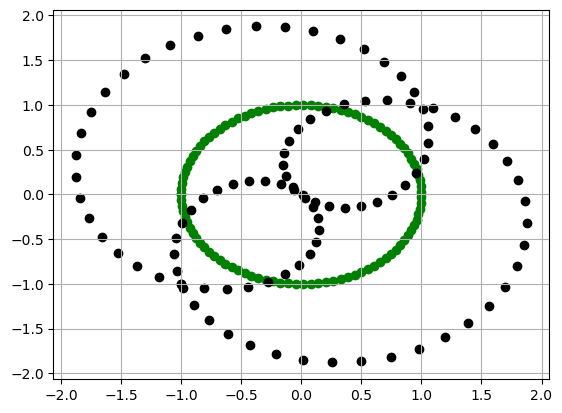

In [11]:
x=np.linspace(-np.pi,np.pi,100)
XMx=[]
YMx=[]

XMz=[]
YMz=[]
a=3#Change 'a' to vary cusps in figure
def f(x,a):
    return (x+0*1j)**a

for i in range(len(x)):
    t=np.exp(1j*x[i])
    z= t + f(t,a)*1j

    XMx.append(np.real(t))
    YMx.append(np.imag(t))
    XMz.append(np.real(z))
    YMz.append(np.imag(z))
plt.scatter(XMx,YMx,color='green')
plt.scatter(XMz,YMz,color='black')
plt.grid(which='major')